<a href="https://colab.research.google.com/github/roywang01-boop/AAI2026/blob/main/Part%20Extra%20Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

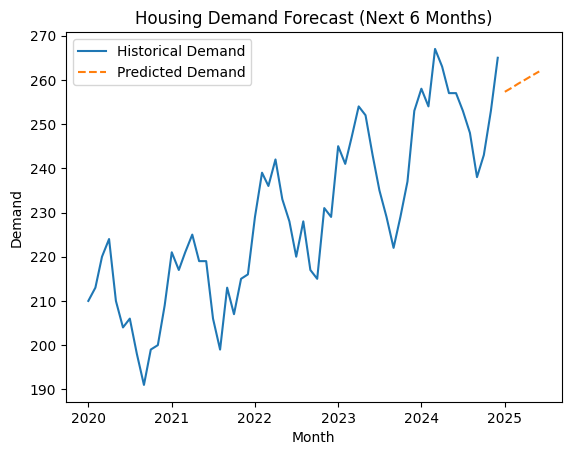

6-month forecast complete.

Assumptions:
- Assumes housing demand follows a linear trend.
- Does not include seasonality or economic factors.
- Could improve by adding interest rates or using ARIMA/Prophet.


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('housing_demand.csv')  # columns: 'month', 'demand'

# Convert month to datetime
df['month'] = pd.to_datetime(df['month'])

# Create numeric month index (0,1,2,3...)
df['month_number'] = range(len(df))

X = df[['month_number']]
y = df['demand']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict next 6 months
future_month_numbers = range(len(df), len(df) + 6)
future_months = pd.DataFrame({'month_number': future_month_numbers})

predictions = model.predict(future_months)

# Create future month dates
future_dates = pd.date_range(
    df['month'].iloc[-1] + pd.offsets.MonthBegin(1),
    periods=6,
    freq='MS'
)

# Plot results
plt.plot(df['month'], y, label='Historical Demand')
plt.plot(future_dates, predictions, linestyle='--', label='Predicted Demand')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Housing Demand Forecast (Next 6 Months)')
plt.legend()
plt.show()

print("6-month forecast complete.")

print("\nAssumptions:")
print("- Assumes housing demand follows a linear trend.")
print("- Does not include seasonality or economic factors.")
print("- Could improve by adding interest rates or using ARIMA/Prophet.")